# Get Coordinates #

This script is used to get all the coordinates of each pose's keypoints and saves it into a CSV file.

### Import dependencies ###

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp

### Resize Image ###

In [43]:
DESIRED_HEIGHT = 800
DESIRED_WIDTH = 800

def resize(image):
    h, w = image.shape[:2]
    if h < w:
        return cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        return cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))

In [46]:
images = []

image1 = resize(cv2.imread("reference_pose/o_migi_chudan_oi_zuki.png"))

images.append(image1)

### Initialize mediapipe ###

In [23]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

### Run mediapipe ###

Nose coordinates: (x: 0.48563823103904724
y: 0.3041992783546448
z: -0.1917036473751068
visibility: 0.9983770847320557



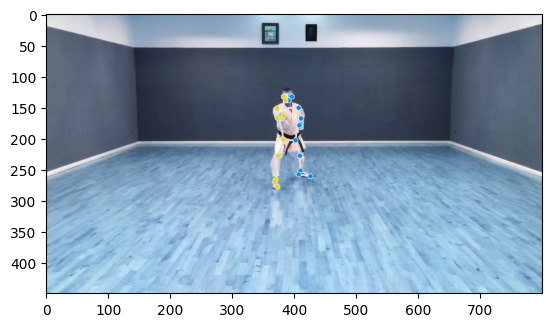

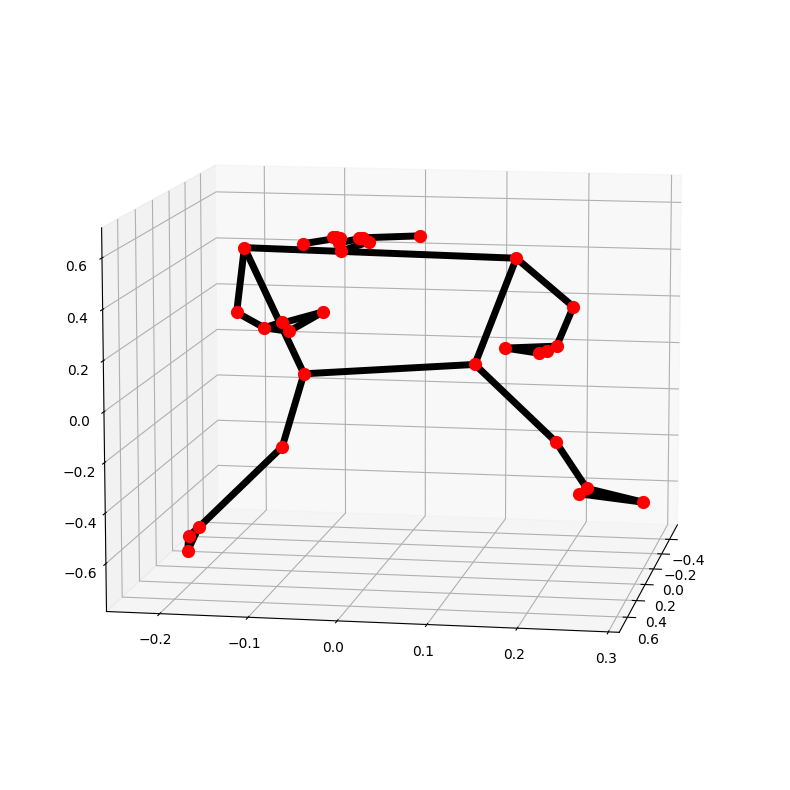

In [47]:
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.7, model_complexity=2) as pose:
    for image in images:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        image_height, image_width, _ = image.shape
        if not results.pose_landmarks:
            continue
        print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE]}'
        )

        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        plt.imshow(annotated_image)

        mp_drawing.plot_landmarks(
            results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)